# Import all necessary libraries

In [1]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Using TensorFlow backend.


# To generate reproducible results

In [2]:
from numpy.random import seed
seed(2)
from tensorflow import set_random_seed
set_random_seed(2)

# Load data and Delete all unnecessary columns

In [3]:
df = pd.read_csv('/home/abhishek/Documents/NLP/Blog/cost-function-visual/Advertising.csv')
df.drop(['Unnamed: 0','radio','newspaper'],axis = 1 , inplace=True)
df.head()

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
print("No. of Examples : {}".format(len(df)))

No. of Examples : 200


# Prepare Training and Test Data

In [5]:
X = df['TV']
Y = df['sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Define Linear Regression model

In [6]:
def LinearRegression():
    model = Sequential()
    model.add(Dense(1, activation = 'linear', use_bias = True, 
                    input_dim = 1))
    model.compile(optimizer = optimizers.RMSprop(lr = 0.01), 
                  loss = 'mean_squared_error', metrics = ['mae'])
    return model 

model = LinearRegression()

In [7]:
weight_history = []
bias_history = []

# Define a Callback

In [8]:
class MyCallback(keras.callbacks.Callback):
    def on_batch_end(self, batch, logs):
        weight, bias = model.get_weights()
        B = bias[0] 
        W = weight[0][0]
        params = [W, B]
        weight_history.append(W)
        bias_history.append(B)
        
callback = MyCallback()

In [9]:
MODEL = model.fit(X_train, Y_train, epochs = 10, batch_size = 10, verbose = True, callbacks=[callback])

Epoch 1/10
160/160 [==============================] - 1s 4ms/step - loss: 5586.0072 - mean_absolute_error: 61.9742
Epoch 2/10
160/160 [==============================] - 0s 201us/step - loss: 2335.0953 - mean_absolute_error: 39.5754
Epoch 3/10
160/160 [==============================] - 0s 193us/step - loss: 809.8268 - mean_absolute_error: 22.7306
Epoch 4/10
160/160 [==============================] - 0s 195us/step - loss: 181.1146 - mean_absolute_error: 10.2224
Epoch 5/10
160/160 [==============================] - 0s 226us/step - loss: 29.7453 - mean_absolute_error: 4.4738
Epoch 6/10
160/160 [==============================] - 0s 175us/step - loss: 22.2868 - mean_absolute_error: 3.9787
Epoch 7/10
160/160 [==============================] - 0s 152us/step - loss: 22.8058 - mean_absolute_error: 4.0397
Epoch 8/10
160/160 [==============================] - 0s 212us/step - loss: 22.7202 - mean_absolute_error: 4.1160
Epoch 9/10
160/160 [==============================] - 0s 193us/step - loss: 23.0

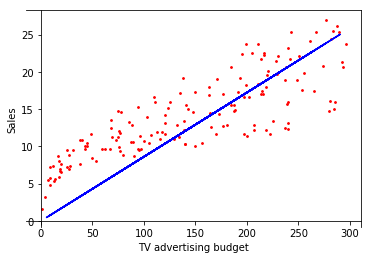

In [10]:
area = np.pi * 1**2

fig, ax = plt.subplots()

ax.scatter(X_train,Y_train,s = area, color = 'red')
ax.plot(X_test,model.predict(X_test),'b')

ax.spines['left'].set_position('zero')

ax.spines['right']
ax.yaxis.tick_left()

ax.spines['bottom'].set_position('zero')

ax.spines['top']
ax.xaxis.tick_bottom()

plt.xlabel("TV advertising budget")
plt.ylabel("Sales")

plt.show()

# Display final weights of the model

In [11]:
weight_matrix,bias_matrix = model.get_weights()

In [12]:
weight_matrix[0][0]

0.08625534

In [13]:
bias_matrix[0]

-0.021305896

## list of weight updates through iterations

In [14]:
weight_history[:5]

[0.602684, 0.58524895, 0.5707742, 0.5589197, 0.5513936]

In [15]:
bias_history[:5]

[-0.03162277, -0.04938902, -0.065991394, -0.07906431, -0.08885604]

# Plotting the cost function

<IPython.core.display.Javascript object>


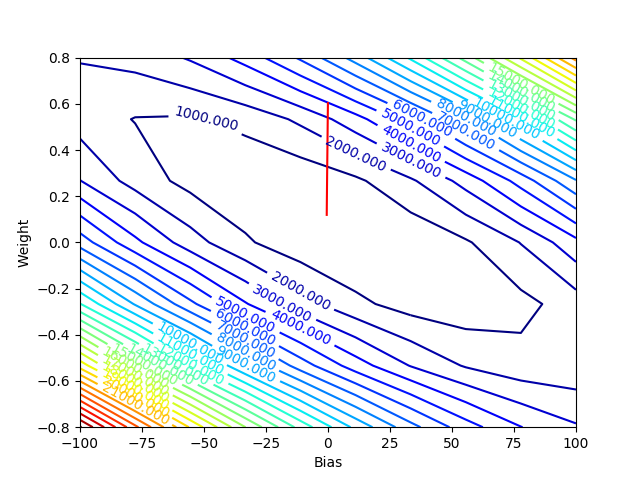

In [22]:
%matplotlib nbagg

def costfunction(x,y,theta):
    
    m = np.size(y)
    h = np.dot(x,theta)
    
    J = float(np.dot((h - y).T,(h - y))/(m*2)); 
    
    return J;

#--------------------------------------------------------------------------

X = np.array(X_train.tolist())
Y = np.array(Y_train.tolist())

X_1 = np.vstack((np.ones(len(X)), X)).T

#Setup of meshgrid of bias(T0)/weight(T1) values
T0, T1 = np.meshgrid(np.linspace(-100,100, 10),np.linspace(-0.8,0.8,7))

#Computing the cost function for each weight/bias combination
zs = np.array(  [costfunction(X_1, Y.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )

#Reshaping the cost values    
Z = zs.reshape(T0.shape)

#--------------------------------------------------------------------------

x = bias_history
y = weight_history



fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
cp = ax.contour(T0, T1, Z, 30, cmap = 'jet')
ax.clabel(cp, inline=True, fontsize=10)

plt.xlabel("Bias")
plt.ylabel("Weight")

graph, = plt.plot([], [], 'r-')

def animate(i):
    graph.set_data(x[:i], y[:i])
    return graph

anime = FuncAnimation(fig, animate, frames=np.arange(0,100), interval=100)

anime.save('cost.gif', dpi=80, writer='imagemagick')

plt.show()

In [17]:
print(weight_history[0])
print(bias_history[0])
print()

0.602684
-0.03162277
()


# Weight history

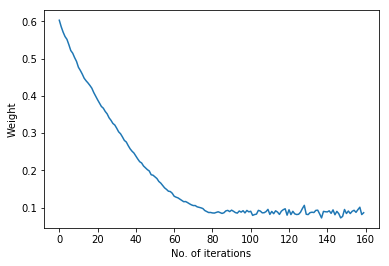

In [21]:
%matplotlib inline

plt.xlabel("No. of iterations")
plt.ylabel("Weight")
plt.plot(weight_history)

# Bias history


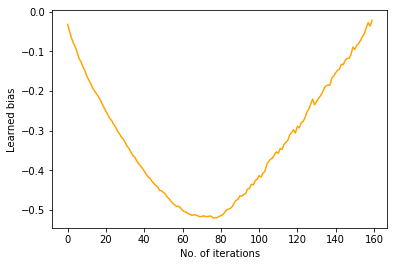

In [20]:
%matplotlib inline

plt.xlabel("No. of iterations")
plt.ylabel("Learned bias")
plt.plot(bias_history, 'orange')

# Cost through iterations

Text(0.5,0,'No. of iterations')

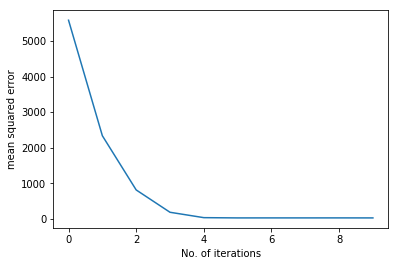

In [19]:
%matplotlib inline

cost_func = MODEL.history['loss']
plt.plot(cost_func)

plt.ylabel("mean squared error")
plt.xlabel("No. of iterations")